# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [6]:
# data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

### Выводы

В датасете присутствуют 3 типа данных: **_object, int64, float64_**

Однако **_float64_** не подразумеваются в датасете судя по описанию данных, значит это ошибка в интерпретации/записи и тип нужно изменить

Многие столбцы категории **_object_** по типу являются категориальными, что говорит нам о том, что значения в нем можно заменить и привести столбец к **_int64_**

In [7]:
for column in data:
    print(data[column].value_counts(), '\n')

980773    2
669700    1
964177    1
501038    1
735578    1
         ..
793239    1
251247    1
586846    1
600731    1
882687    1
Name: ID, Length: 1043, dtype: int64 

Por     649
Math    395
Name: Subject, dtype: int64 

GP    772
MS    272
Name: school, dtype: int64 

F    591
M    446
m      7
Name: sex, dtype: int64 

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64 

U    759
R    285
Name: address, dtype: int64 

GT3    738
LE3    306
Name: famsize, dtype: int64 

T    918
A    121
t      5
Name: Pstatus, dtype: int64 

4    306
2    289
3    238
1    202
o      6
0      3
Name: Medu, dtype: int64 

2    324
1    256
3    231
4    224
0      6
o      3
Name: Fedu, dtype: int64 

other       399
services    239
at_home     184
teacher     130
health       82
at-home      10
Name: Mjob, dtype: int64 

other       584
services    292
teacher      65
at_home      52
health       41
at-home      10
Name: Fjob, dtype: int64 

co

Теперь когда мы посмотрели на уникальные значения столбцов, мы можем точно сказать, что столбцы типа **_float64_** спокойно могут быть приведены к типу **_int64_**. Это колонки: **famrel, Dalc, Walc**

Так как в столбцах присутсвуют значения **_NaN_** мы не можем применить к ним функцию **.astype('int64')**, поэтому мы заменим значения **Nan** на 3 и приведем эти столбцы ткаже к **_int64_**. Так как эти столбцы категориальны и значение их - это величина от 1 до 5, мы возьмем среднее ("нормальное") значение - 3.

Выведем списки уникальных значений в каждом столбце типа **_object_**. Затем соберем словарь собственоручно для дальнейшей замены значений на нужные нам. Посмотреть количество использований значения мы можем выше, но понять какие типы нам нужны можно и из файла **_'students_data_features'_**

In [8]:
# Заменим ошибки, соберем уникальные значения столбцов типа object в словарь для возможности дальейшей замены на int
data_clean = data.copy()

mistakes = {'m': 'M', 't': 'T', 'o': '0', 'at-home': 'at_home', 'futher': 'father'}
for cat in ['sex', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']:
    data_clean[cat] = data_clean[cat].replace(mistakes)

for col in ['famrel', 'Dalc', 'Walc', 'Medu', 'Fedu']:
    data_clean[col] = data_clean[col].fillna('3').astype('int64')

categories = {}
for col in data_clean.columns:
    if data_clean[col].dtype in ['object', 'float']:
        categories[col] = sorted([val for val in data_clean[col].unique() if not str(val)=='nan'])
categories

{'Subject': ['Math', 'Por'],
 'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['R', 'U'],
 'famsize': ['GT3', 'LE3'],
 'Pstatus': ['A', 'T'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Fjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'reason': ['course', 'home', 'other', 'reputation'],
 'guardian': ['father', 'mother', 'other'],
 'schoolsup': ['no', 'yes'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['no', 'yes'],
 'higher': ['no', 'yes'],
 'internet': ['no', 'yes'],
 'romantic': ['no', 'yes'],
 'cheating': ['no', 'yes']}

In [9]:
data_int = data_clean.copy()

for cat in categories:
    dict_time = {}
    for ind, v in enumerate(categories[cat]):
        dict_time[v] = ind
    data_int[cat] = data_int[cat].map(dict_time)
    if cat in ['romantic', 'cheating']:
        data_int[cat] = data_int[cat].fillna('0').astype('int64')

for column in data_int:
    print(column, data_int[column].unique(), '\n')
data_int.info()

ID [100097 101021 102965 ... 998425 999143 999194] 

Subject [1 0] 

school [0 1] 

sex [0 1] 

age [16 17 18 15 19 21 20 22] 

address [1 0] 

famsize [0 1] 

Pstatus [0 1] 

Medu [3 1 2 4 0] 

Fedu [4 2 3 1 0] 

Mjob [3 2 1 0 4] 

Fjob [2 3 1 0 4] 

reason [0 1 3 2] 

guardian [0 1 2] 

traveltime [1 2 3 4] 

studytime [1 2 4 3] 

failures [0 2 1 3] 

schoolsup [0 1] 

famsup [0 1] 

paid [0 1] 

activities [0 1] 

nursery [1 0] 

higher [1 0] 

internet [1 0] 

romantic [0 1] 

famrel [3 5 4 1 2] 

freetime [2 3 4 1 5] 

goout [1 4 5 3 2] 

Dalc [1 3 4 2 5] 

Walc [4 3 5 1 2] 

health [5 3 4 2 1] 

absences [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75] 

cheating [0 1] 

G1 [15 17  9 14 12 11 13  7 16  6  8 10 18  0  5  3  4 19] 

G2 [13 18  8 15 11 12 14  6 10 16  5  7  9 17  0  4 19] 

G3 [14 17 10 16 13 12  9  6 11  8 18 15  0  5  7 19  4  1 20] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 104

Значения **_NaN_** в столбцах **'romantic'** и **'cheating'** мы заменили на 0 для того, чтоб привести эти столбцы к **int64** типу. Так как, по моему мнению, **'no'** в этих графах значит меньше, чем **'yes'**, мы заменим **NaN** именно на **'no'** (0). Также мы можем предположить, что если об этих данных ничего не известно, то указать отсутсвие показателя довольно логично.

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [10]:
for col in data.columns:
    if data[col].isnull().sum() != 0:
        print(col, data[col].isnull().sum())

romantic 10
famrel 10
Dalc 10
Walc 10
cheating 700


**romantic**: Из-за небольшого количества пропущенных данных, можно предположительно поставить no вместо пропусков, так как это, во-первых, наиболее частотный ответ, во-вторых, он влияет на данные меньше, чем yes в данной графе, как мне кажется.

**famrel**: Так как это довольно важный признак, как мне кажется, а пропусков не так много, можно заполнить их средним значением по столбцу как наиболее сбалансированный вариант.

**Dalc**: Предположить значение по данному признаку практически невозможно, подставить случайное значние тоже плохая идея, поэтому, как и в предыдущем случае, можно заполнить его средним значением.

**Walc**: Та же ситуация как и с Dalc.

**cheating**: С одной стороны, пропущено 67% данных, что позволяет нам удалить этот столбец, если мы можем пренебречь некоторой точностью результата. С другой стороны, отсутствие данных можно интерпретировать как no, так как если они не были пойманы на списывании, мы и не можем ничего посчитать.

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

<AxesSubplot:>

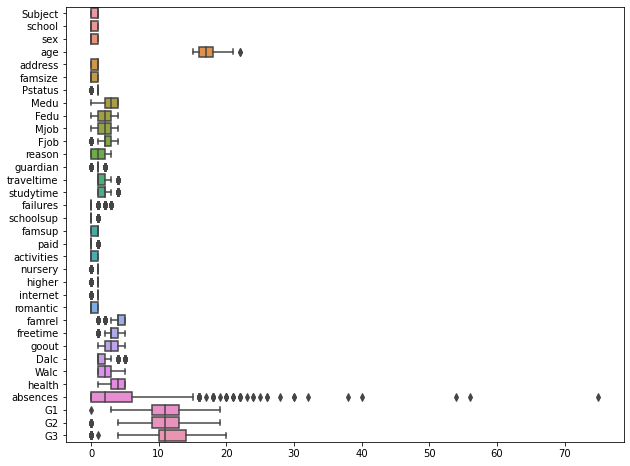

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_int.drop(columns=['ID', 'cheating']).dropna(axis=0), orient='h')

#### Вывод

Мы видим, что в колонке пропусков (absences) достаточно разнообразные значения, что дает нам много выбросов, которые мешают рассмотреть остальные признаки поближе. В то же время мы видим, что большинство значений находятся в диапазоне от 0 до примерно 6 (75%), а также до 15 (абсолютное большинство значений, конец "уса"). Остальные данные (кол-во пропусков больше 15) рассматриваются как выбросы.

Посмотрим также график без этого столбца:

<AxesSubplot:>

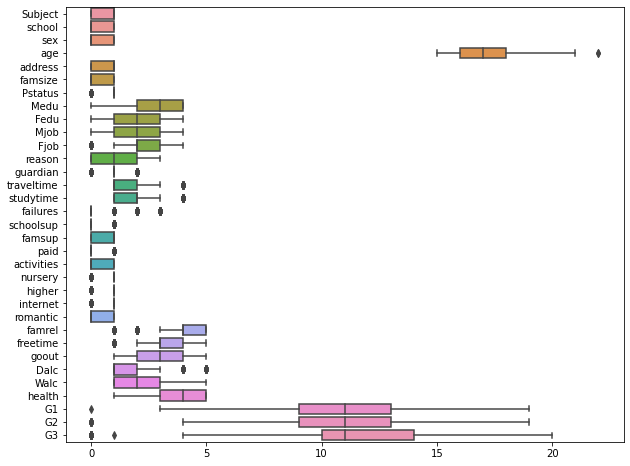

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_int.drop(columns=['ID', 'cheating', 'absences']).dropna(axis=0), orient='h')

#### Вывод

Мы видим, что в признаке возраст имеется выброс, который старше примерно 22 лет, большинство же данных лежит в диапазоне от 15 до 21 года.

Однако значения признака "возраст" довольно большие относительно остальных значений, поэтому нам может быть интересно посмотреть на признаки без столбца "age":

<AxesSubplot:>

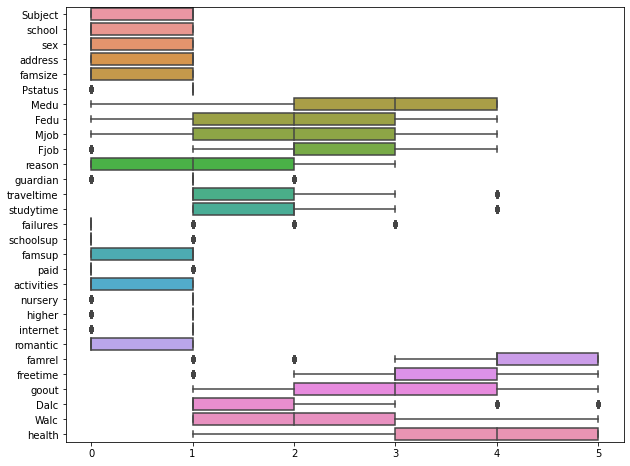

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_int.drop(columns=['ID', 'cheating', 'absences', 'age', 'G1', 'G2', 'G3']).dropna(axis=0), orient='h')

#### Вывод

Посмотрев на категориальные признаки, мы можем увидить, что в них довольно сложно определять выбросы, так как по многим признакам данные распределенны достаточно равномерно. Тем не менее, в таких признаках, как **Fjob, traveltime, studytime, famrel, Dalc** некоторые данные всё же определяются как выбросы.

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [14]:
# для числовых признаков
data_clean.describe()

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.190613,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.927203,3.201149,3.156130,1.511494,2.297893,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.330362,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933281,1.031507,1.152575,0.922117,1.283555,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999194.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


В данной статистике нас могут интересовать средние значения признаков (помимо столбца ID, конечно): к примеру, средний возраст в датасете 16.7, среднее время в пути от дома до школы от нуля (знчение '1') до 30 (значение '2') минут и так далее. Средняя оценка по всем полугодиям и общая годовая практически равны - 11.2-11.3

In [15]:
# для категориальных признаков
data_clean.select_dtypes(include='object').describe()

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1034,344
unique,2,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,Por,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,yes
freq,649,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,664,175


Здесь нам могут понадобиться самые частотные значения признаков: к примеру, большинство учащихся в датасете - женского пола, также большинство изучает португальский и ходит в школу Gabriel Pereira.

In [16]:
# Сколько студентов посещают каждую из школ?
print(data_clean['school'].value_counts(), '\n')
    
# Сколько студентов посещают математику, сколько - португальский?
print(data_clean['Subject'].value_counts(), '\n')

# Студенты какого курса чаще заваливают экзамены?
print(data_clean.groupby(['Subject'])['failures'].value_counts(), '\n')

# Сколько в среднем времени в неделю уходит на учебу по каждому предмету?
print(data_clean.groupby(['Subject'])['studytime'].describe(), '\n')

# На что чаще обращают внимание при выборе школы?
print(data_clean['reason'].value_counts(), '\n')

GP    772
MS    272
Name: school, dtype: int64 

Por     649
Math    395
Name: Subject, dtype: int64 

Subject  failures
Math     0           312
         1            50
         2            17
         3            16
Por      0           549
         1            70
         2            16
         3            14
Name: failures, dtype: int64 

         count      mean      std  min  25%  50%  75%  max
Subject                                                   
Math     395.0  2.035443  0.83924  1.0  1.0  2.0  2.0  4.0
Por      649.0  1.930663  0.82951  1.0  1.0  2.0  2.0  4.0 

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64 



#### Выводы

1) 772 ученика посещают школу Gabriel Pereira, а 272 ученика - школу Mousinho da Silveira.

2) 649 ученика изучают португальский, 395 - математику.

3) Студенты математики завалили предыдущие курсы (50 + 17 + 16) 83 раза, а студенты португальского - (70 + 16 + 14) 100 раз. Следовательно, стуендты португальского имеют больше провалов (однако нельзя забывать, что все пропуски больше трех отмечены цифрой 3).

4) В среднем на учебу по математике уходит от 2 до 5 часов (значение '2') и по португальскому приблизительно такая же ситуация.

5) Чаще всего выбирают школу по читаемым в ней курсам.

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

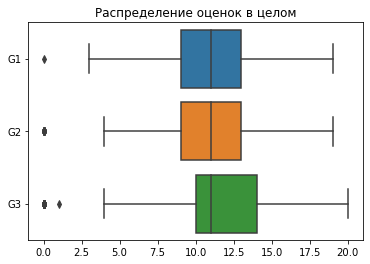

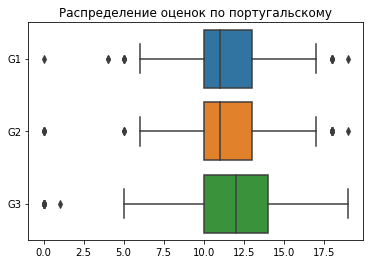

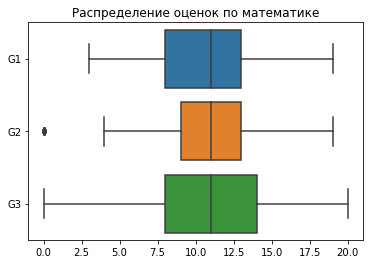

In [17]:
sns.boxplot(data=data_int[['G1', 'G2', 'G3']], orient='h').set_title("Распределение оценок в целом")
plt.show()
sns.boxplot(data=data_clean[data_clean['Subject']=='Por'][['G1', 'G2', 'G3']], orient='h').set_title("Распределение оценок по португальскому")
plt.show()
sns.boxplot(data=data_clean[data_clean['Subject']=='Math'][['G1', 'G2', 'G3']], orient='h').set_title("Распределение оценок по математике")
plt.show()

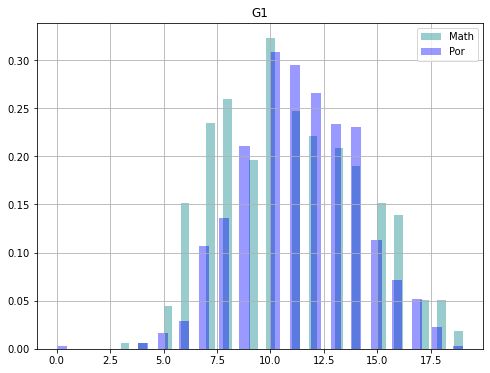

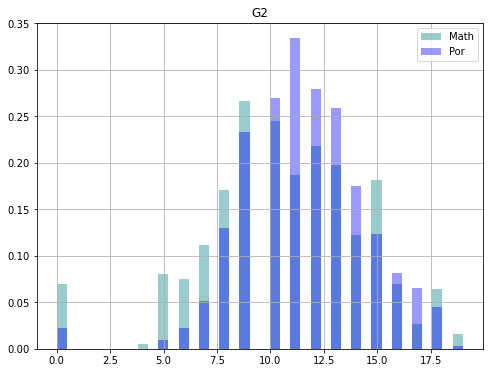

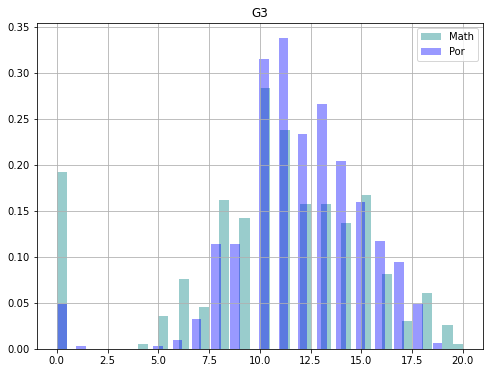

In [18]:
for sub in ['G1', 'G2', 'G3']:
    plt.figure(figsize=(8, 6))
    data_clean[sub][data_clean['Subject']=='Math'].hist(bins = 40, color = 'teal', alpha = 0.4, label='Math', density=True)
    data_clean[sub][data_clean['Subject']=='Por'].hist(bins = 40, color = 'blue', alpha = 0.4, label='Por', density=True)
    plt.legend(loc='upper right')
    plt.title(sub)
    plt.show()

#### Вывод

В среднем оценки по португальскому выше, чем по математике (медиана на боксплоте). Однако оценки по математикие имеют больший разброс (границы коробки графика, малое количество выбросов). Чаще выбросами считаются низкие оценки, что говорит о том, что большинство студентов учится хорошо. Тем не менее по португальскому за первые два полугодия высшие оценки также рассматриваются как выбросы.

Во втором полугодии оценки по португальскому расположены ближе к центру (больше средних оценок), а по математике - наоборот (относительно друг друга). По итогам всего года можно сказать, что высоких и средних оценок по португальскому больше, а по математике больше низких значений.

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [19]:
corr_num = data_clean.select_dtypes(include=['int64']).corr()
corr_num.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,1.00,0.01,0.00,-0.01,0.02,0.04,0.01,0.04,0.03,-0.04,-0.01,-0.08,-0.01,-0.04,0.04,0.02,0.02
age,0.01,1.00,-0.13,-0.14,0.05,-0.01,0.28,0.01,0.00,0.12,0.12,0.09,-0.03,0.15,-0.12,-0.12,-0.13
Medu,0.00,-0.13,1.00,0.64,-0.24,0.09,-0.19,0.01,0.00,0.03,0.00,-0.03,-0.01,0.06,0.23,0.22,0.20
Fedu,-0.01,-0.14,0.64,1.00,-0.20,0.03,-0.19,0.01,0.00,0.03,0.00,0.01,0.03,0.04,0.20,0.18,0.16
traveltime,0.02,0.05,-0.24,-0.20,1.00,-0.08,0.09,-0.01,-0.01,0.05,0.12,0.08,-0.03,-0.02,-0.12,-0.14,-0.10
studytime,0.04,-0.01,0.09,0.03,-0.08,1.00,-0.15,0.01,-0.09,-0.07,-0.16,-0.23,-0.06,-0.08,0.21,0.18,0.16
failures,0.01,0.28,-0.19,-0.19,0.09,-0.15,1.00,-0.05,0.10,0.07,0.11,0.11,0.05,0.10,-0.37,-0.38,-0.38
famrel,0.04,0.01,0.01,0.01,-0.01,0.01,-0.05,1.00,0.13,0.08,-0.07,-0.10,0.10,-0.06,0.04,0.04,0.05
freetime,0.03,0.00,0.00,0.00,-0.01,-0.09,0.10,0.13,1.00,0.32,0.13,0.13,0.08,-0.03,-0.05,-0.07,-0.06
goout,-0.04,0.12,0.03,0.03,0.05,-0.07,0.07,0.08,0.32,1.00,0.24,0.40,-0.01,0.06,-0.10,-0.11,-0.10


#### Вывод

1) Сильнее всего между собой коррелируют показатели оценок, что логично, особенно по отношению к **G3**, так как она, вероятно, складывается из оценок **G2** и **G3**.

2) Довольно сильно также коррелируют показатели **Dalc** и **Walc** (употребление алкоголя в будни и в выходные). Они могут коррелировать так, если употребление алкоголя по будням примерно равно употреблению в выходные.
На таком же уровне коррелируют между собой показатели **Fedu** и **Medu** (образование отца и матери), что говорит нам о том, что чаще люди выбирали человека с таким же уровнем образования.

3) Чуть меньше, но все же коррелируют такие пары показателей: **Walc** и **goout**, **goout** и **freetime**, **failures** и **age**. Первые два кажутся логичными, так как при увеличении одного скорее всего увеличится и второй показатель. Последняя корреляция может вытекать из пердыдущих зависимостей.

4) Довольно сильную отрицательную корреляцию имеют показатель **failures** с показателями оценок (**G1, G2, G3**). Такая зависимость тоже не удивительна, так как чем меньше провалов на прошлых курсах, тем выше оценка на данном курсе. 

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [20]:
corr_obj = data_int.drop(columns=list(data_clean.select_dtypes(include=['int64']).columns)).corr()
corr_obj.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
Subject,1.00,0.26,-0.06,-0.09,0.01,-0.03,-0.09,-0.03,-0.06,-0.02,-0.04,0.00,-0.47,-0.02,0.01,-0.10,-0.08,0.03,-0.03
school,0.26,1.00,-0.07,-0.34,0.03,0.02,-0.18,-0.06,-0.11,-0.04,-0.13,-0.09,-0.13,-0.10,-0.02,-0.13,-0.22,0.08,0.02
sex,-0.06,-0.07,1.00,0.01,0.09,0.05,0.17,0.08,-0.03,-0.05,-0.12,-0.14,-0.00,0.12,-0.03,-0.08,0.06,-0.11,0.01
address,-0.09,-0.34,0.01,1.00,0.05,-0.07,0.15,-0.00,-0.01,-0.03,0.02,0.01,0.05,-0.02,0.03,0.07,0.19,-0.02,0.00
famsize,0.01,0.03,0.09,0.05,1.00,-0.21,0.04,-0.07,0.01,-0.00,-0.05,-0.07,-0.03,-0.01,0.10,0.00,0.01,-0.01,0.03
Pstatus,-0.03,0.02,0.05,-0.07,-0.21,1.00,-0.04,0.05,-0.02,-0.15,-0.02,0.01,0.04,0.10,-0.05,0.01,0.07,-0.04,-0.06
Mjob,-0.09,-0.18,0.17,0.15,0.04,-0.04,1.00,0.20,0.05,0.01,-0.01,0.04,0.09,0.10,0.06,0.14,0.25,-0.07,-0.01
Fjob,-0.03,-0.06,0.08,-0.00,-0.07,0.05,0.20,1.00,0.02,-0.08,-0.01,-0.04,-0.01,0.02,-0.04,0.05,0.07,-0.00,-0.01
reason,-0.06,-0.11,-0.03,-0.01,0.01,-0.02,0.05,0.02,1.00,-0.04,0.04,0.04,0.07,0.09,0.05,0.09,0.09,-0.02,-0.04
guardian,-0.02,-0.04,-0.05,-0.03,-0.00,-0.15,0.01,-0.08,-0.04,1.00,-0.05,0.01,0.06,0.00,-0.05,-0.08,-0.02,0.10,-0.03


#### Вывод

1) Во-первых стоит заметить, что сильно (выше 0.25) ни одни показатели не коррелируют. А такая корреляция (0.25) у показателей **internet** и **Mjob** (кодировка Mjob - {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}), что усложняет нам интерпретацию результата ("интернет" имеет два значения - 0: отсутствие (no), 1: присутствие (yes)).

2) Чуть меньше, но также сильно, коррелируют показатели **Fjob** и **Mjob** (работа отца и матери). Показатели работы отца и матери закодированы одинаково, что позволяет нам предположить (учитывая что корреляция довольно мала - 0.20), что люди, также как с образованием, чаще выбирают людей своей профессии.

3) Присутствует небольшая корреляция интернета и адресса (места проживания), последнее было закодировано следующим образом - 'R' (не в городе): 0, 'U' (в городе): 1, что говорит нам о том, что больше городских жителей имеют доступ в интернет, чем сельских.

4) Интересно рассмотреть сильную отрицательную корреляцию - **paid и Subject** (-0.47) и **address и school** (-0.34). (('Subject': ['Math': 0, 'Por': 1], 'paid': ['no': 0, 'yes': 1], 'school': ['GP': 0, 'MS': 1], 'address': ['R': 0, 'U': 1])). Можно предположить, что большинство нуждается в платных дополнительных курсах по математике; больше городских жителей, чем сельских ходят в школу GP (и наоборот).

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

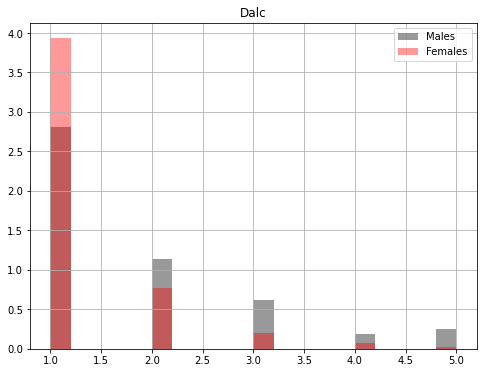

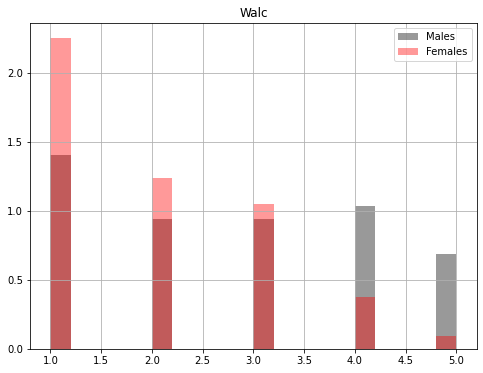

sex  Dalc
F    1       465
     2        91
     3        23
     4         9
     5         3
M    1       254
     2       103
     3        56
     5        23
     4        17
Name: Dalc, dtype: int64 

sex  Walc
F    1       266
     2       146
     3       124
     4        44
     5        11
M    1       127
     4        94
     2        85
     3        85
     5        62
Name: Walc, dtype: int64


In [21]:
# 1
for sub in ['Dalc', 'Walc']:
    plt.figure(figsize=(8, 6))
    data_clean[sub][data_clean['sex']=='M'].hist(bins = 20, color = 'black', alpha = 0.4, label='Males', density=True)
    data_clean[sub][data_clean['sex']=='F'].hist(bins = 20, color = 'red', alpha = 0.4, label='Females', density=True)
    plt.legend(loc='upper right')
    plt.title(sub)
    plt.show()

print(data_clean.groupby('sex')['Dalc'].value_counts(), '\n')
print(data_clean.groupby('sex')['Walc'].value_counts())

#### Вывод №1

Чем больше показатель употребления алкоголя (чем ближе к "5"), тем больше студентов мужского пола в датасете. Соответственно, больше мужчин употребляет алкоголь (в больших количествах)

In [22]:
# 2. Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime.
data_alc = data_int[['Dalc', 'Walc', 'address', 'Pstatus', 'higher', 'romantic', 'freetime']]
corr_alc = data_alc.corr()
corr_alc.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Dalc,Walc,address,Pstatus,higher,romantic,freetime
Dalc,1.00,0.61,-0.07,0.02,-0.11,0.04,0.13
Walc,0.61,1.00,-0.04,0.04,-0.08,-0.02,0.13
address,-0.07,-0.04,1.00,-0.07,0.07,-0.02,-0.01
Pstatus,0.02,0.04,-0.07,1.00,0.01,-0.04,0.04
higher,-0.11,-0.08,0.07,0.01,1.00,-0.10,-0.09
romantic,0.04,-0.02,-0.02,-0.04,-0.10,1.00,0.01
freetime,0.13,0.13,-0.01,0.04,-0.09,0.01,1.00


<Figure size 432x288 with 0 Axes>

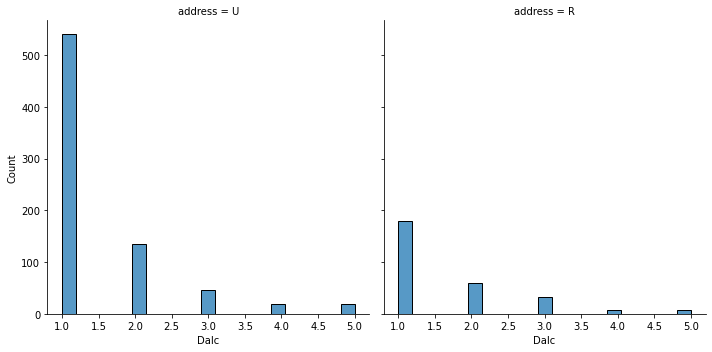

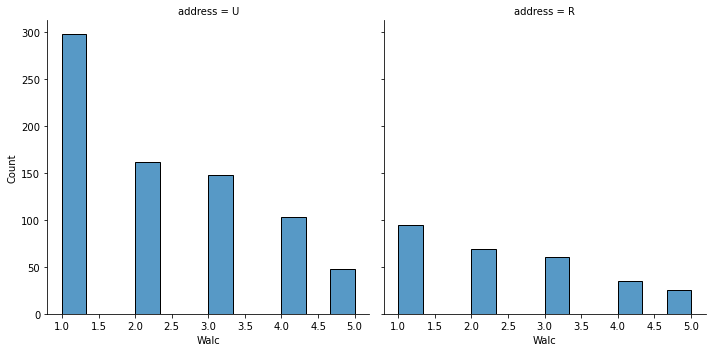

<Figure size 432x288 with 0 Axes>

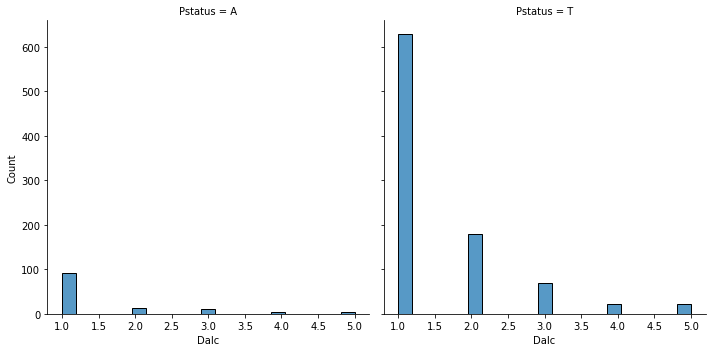

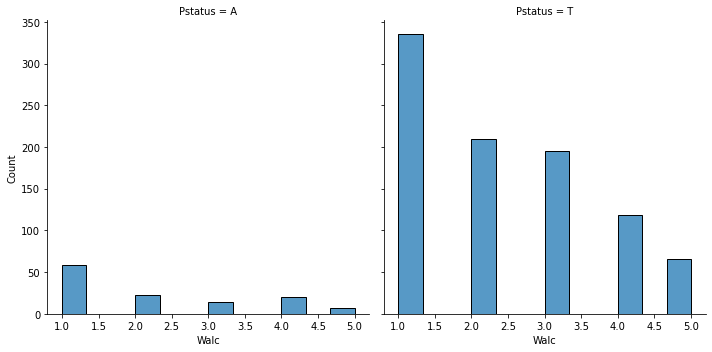

<Figure size 432x288 with 0 Axes>

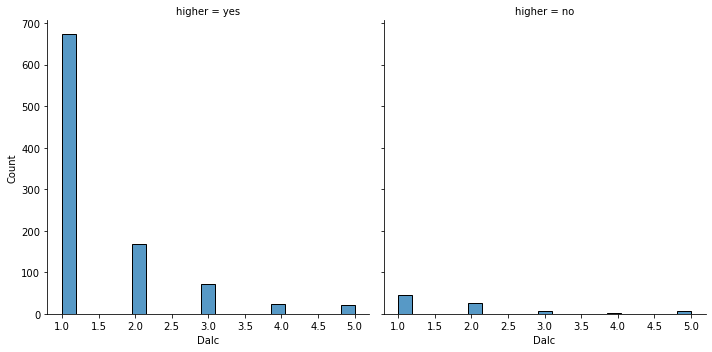

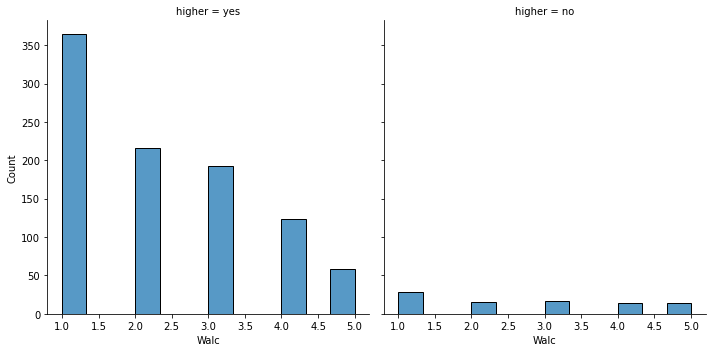

<Figure size 432x288 with 0 Axes>

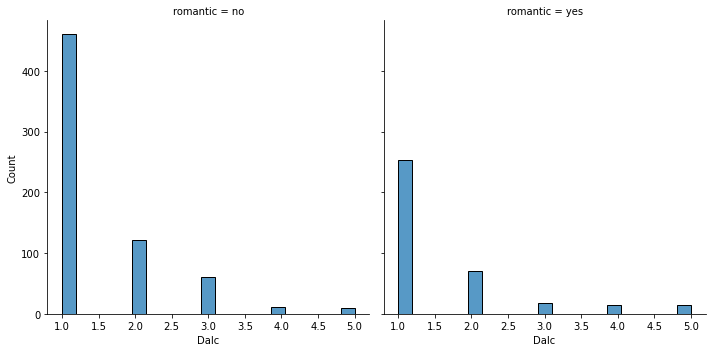

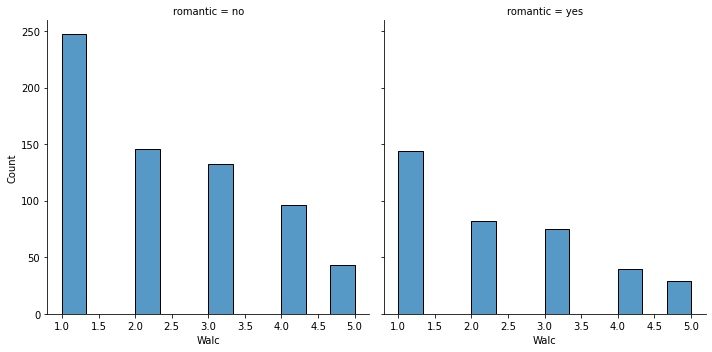

<Figure size 432x288 with 0 Axes>

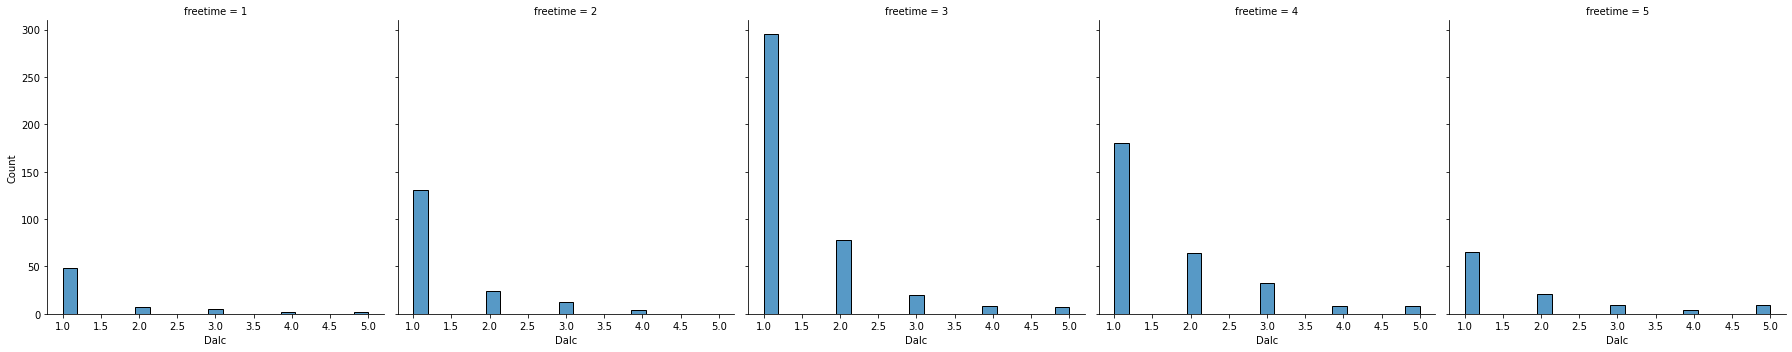

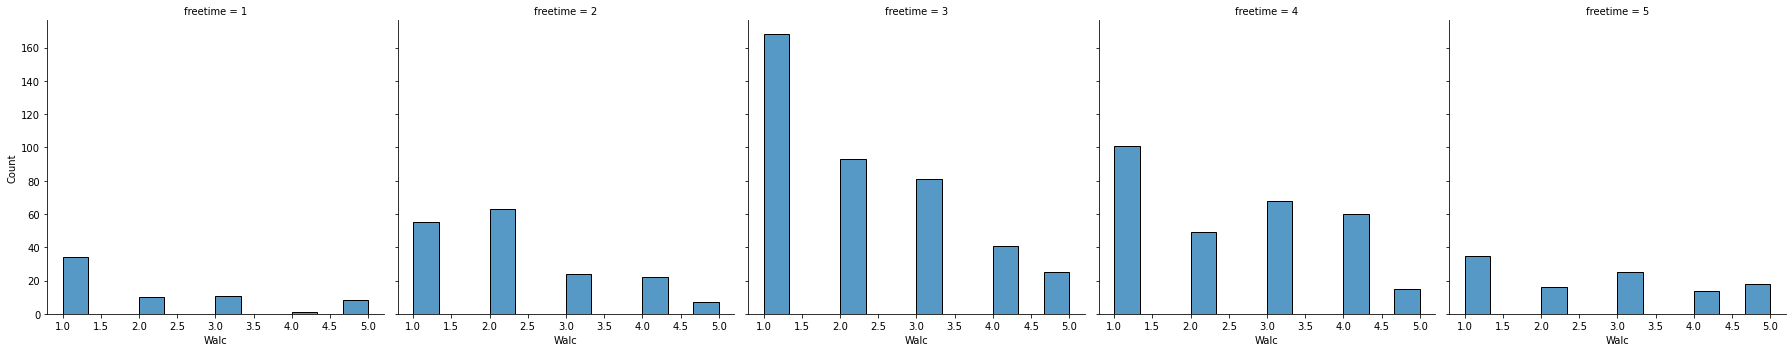

In [23]:
for sub in ['address', 'Pstatus', 'higher', 'romantic', 'freetime']:
    plt.figure(figsize=(6, 4))
    sns.displot(col=sub, x='Dalc', data=data_clean)
    sns.displot(col=sub, x='Walc', data=data_clean)
    plt.show()

#### Вывод №2

Кажется, что связь незначительна.

1) Тем не менее из матрицы корреляций можно увидеть, что сильнее всего (причем отрицательно) коррелируют показатели алкоголя с **higher** (собирается ли получать высшее образование) (причем и **Dalc**, и **Walc**, но Dalc сильнее) (('higher': ['no': 0, 'yes': 1])), то есть чем больше значение higher (1), тем меньше употребление алкоголя и в будни, и в выходные. Положительно эти показатели (**Dalc, Walc**) коррелируют сильней всего с **freetime**, то есть чем больше свободного времени, тем больше употребление алкоголя.

2) Судя по графику: (а) Городские студенты употребляют алкоголь реже в обоих случаях (Dalc и Walc), что отражается в столбце показателя "1" (у показателя 'U' он выше), к этому же можно отнести высоту показателя "2".

(б) В целом больше студентов употребляют алкоголь, если родители вместе ('T'), однако столбец "1" (очень мало) все равно оказывается выше других.

(в) Студенты не состоящие в романтических отношениях употребляют алкоголь меньше (высота столбца "1"), при том, что остальные столбца (2-5) примерно равны.

(г) Приблизительно для всех столбцов распределение по свободному времени имеет форму холма (с вершиной в показателе 3), но нельзя не отметить, что показатели столбцов 1 и 2 ниже столбцов 4 и 5.

In [24]:
# 3. Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно)
data_edu = data_int[['Dalc', 'Walc', 'Medu', 'Fedu']]
corr_edu = data_edu.corr()
corr_edu.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Dalc,Walc,Medu,Fedu
Dalc,1.00,0.61,0.00,0.00
Walc,0.61,1.00,-0.03,0.01
Medu,0.00,-0.03,1.00,0.64
Fedu,0.00,0.01,0.64,1.00


<Figure size 432x288 with 0 Axes>

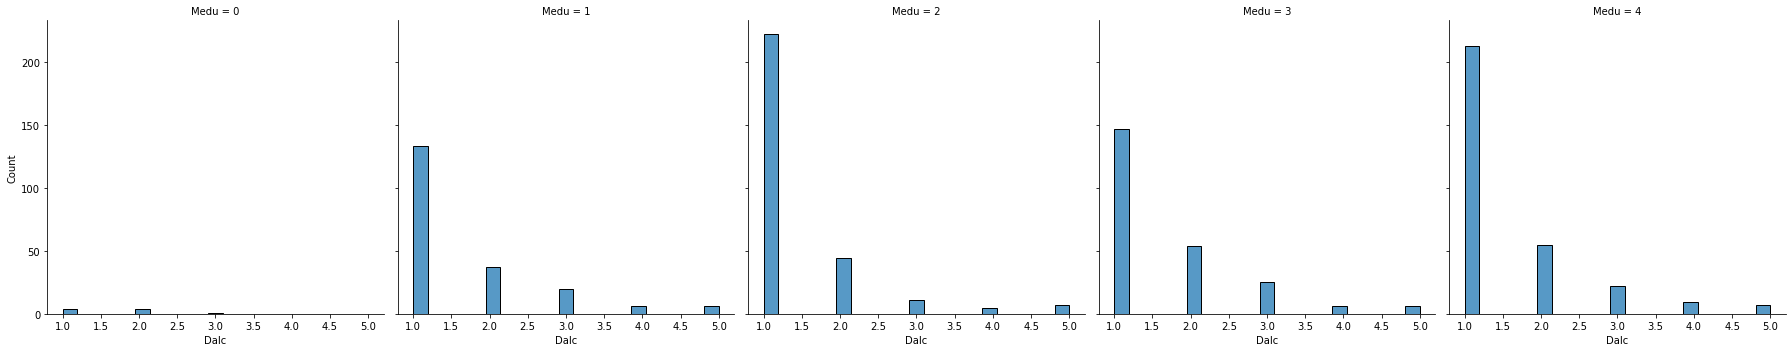

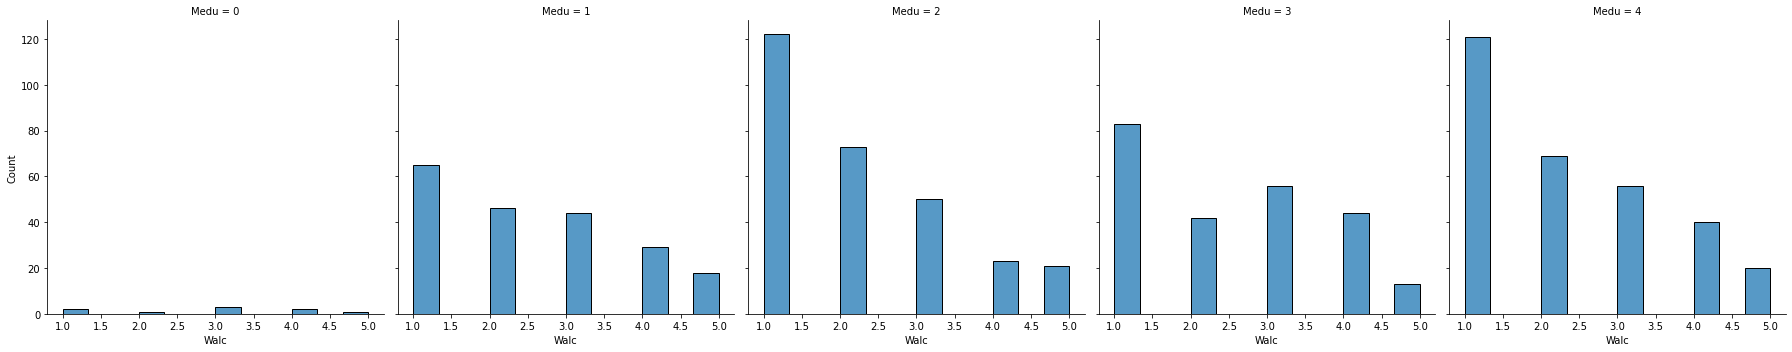

<Figure size 432x288 with 0 Axes>

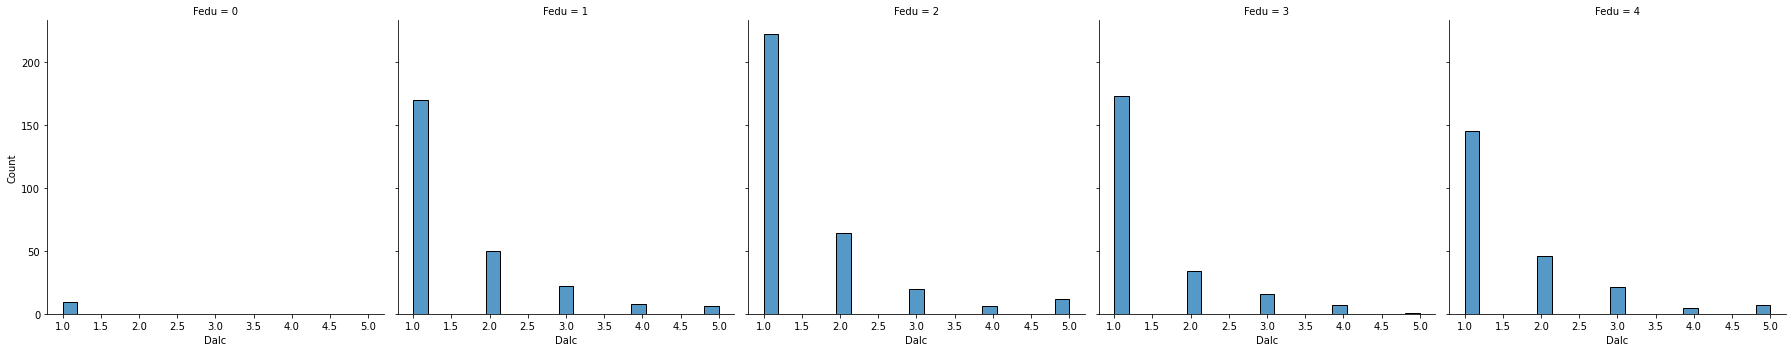

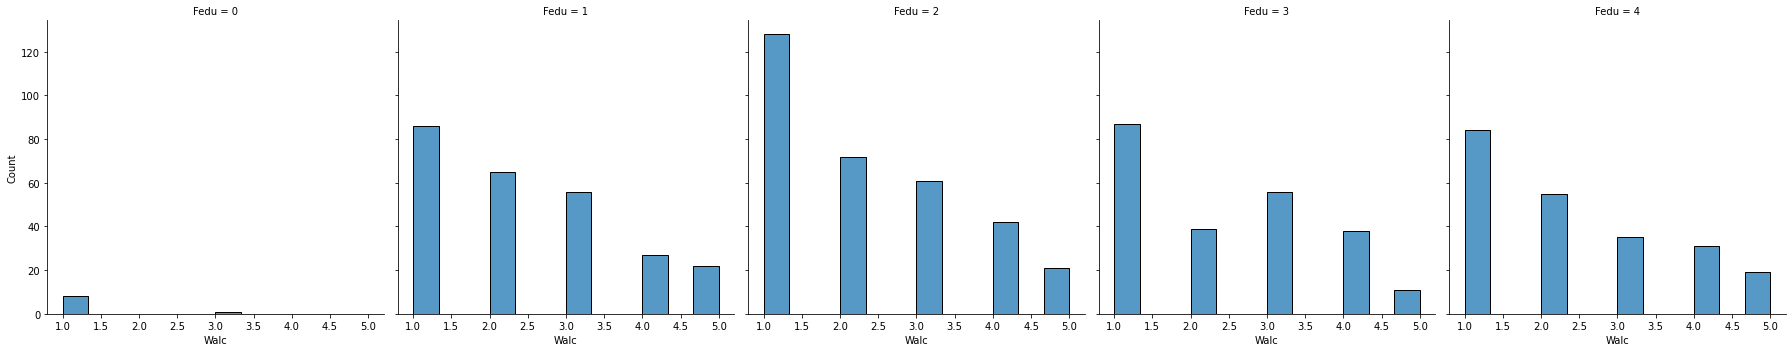

In [25]:
for sub in ['Medu', 'Fedu']:
    plt.figure(figsize=(6, 4))
    sns.displot(col=sub, x='Dalc', data=data_clean)
    sns.displot(col=sub, x='Walc', data=data_clean)
    plt.show()

#### Вывод №3
В целом, связь слабо прослеживается по обеим парам показателей, что подтверждается и матрицей корреляции, и столбчатыми графиками.

Marks of top 50 students: [20 19 18 17]
Marks of lowest 50 students: [0]
Top 50 students


<Figure size 432x288 with 0 Axes>

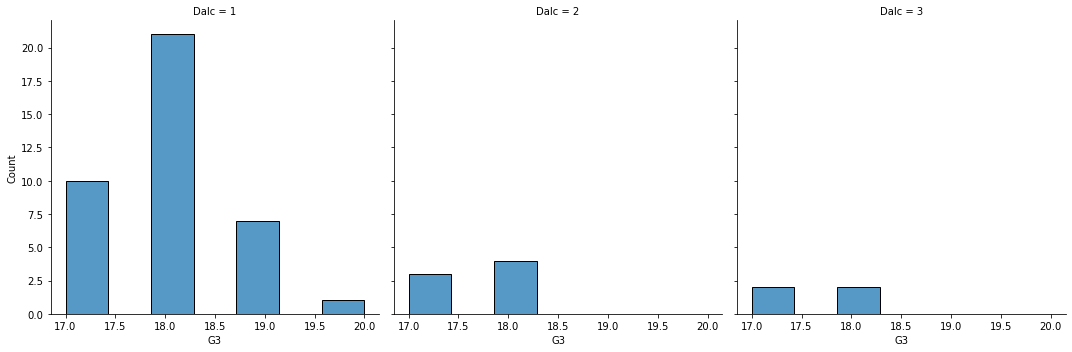

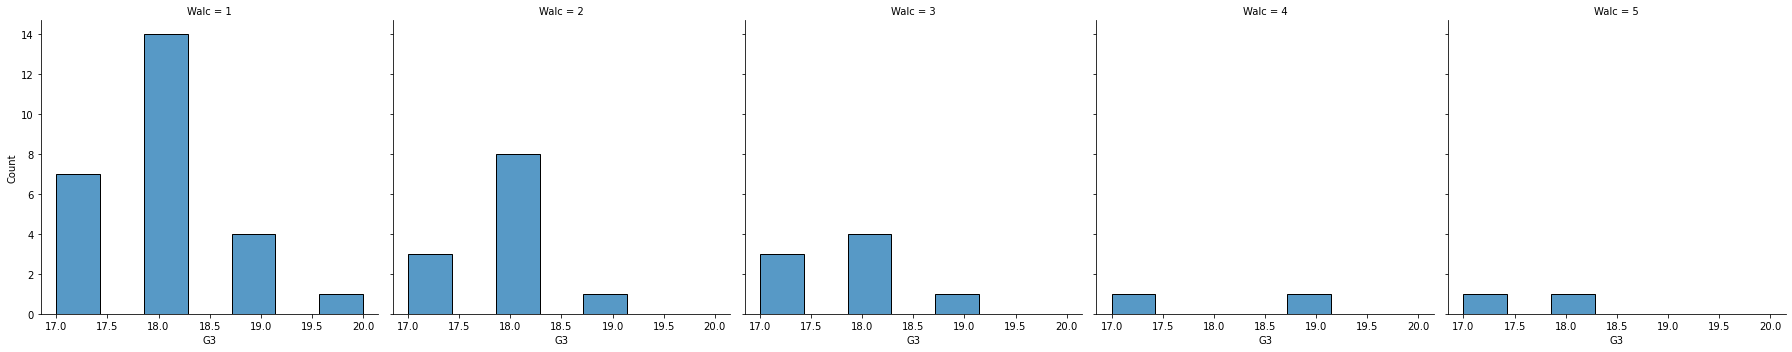

Lowest 50 students


<Figure size 432x288 with 0 Axes>

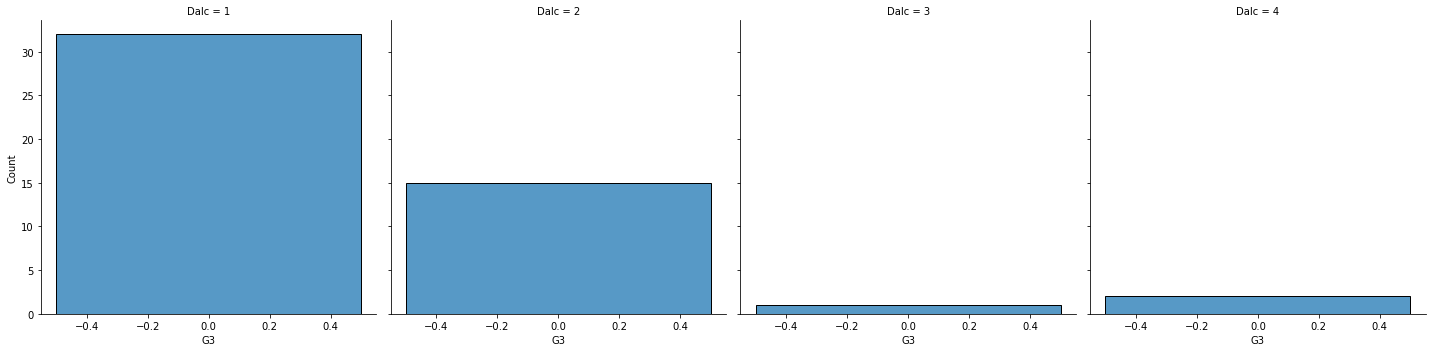

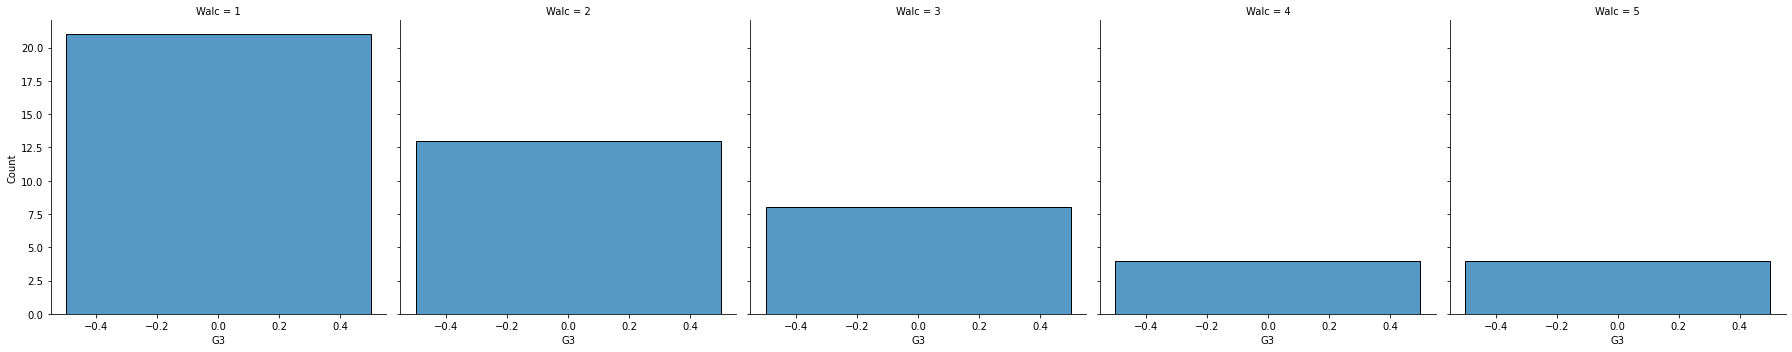

In [26]:
# 4. Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). 

top_students = data_clean[['ID', 'G3', 'Subject', 'Dalc', 'Walc']].sort_values('G3', ascending=False)[0:50]
print('Marks of top 50 students:', top_students['G3'].unique())
low_students = data_clean[['ID', 'G3', 'Subject', 'Dalc', 'Walc']].sort_values('G3', ascending=False)[-50:]
print('Marks of lowest 50 students:', low_students['G3'].unique())

print('Top 50 students')
plt.figure(figsize=(6, 4))
sns.displot(col='Dalc', x='G3', data=top_students)
sns.displot(col='Walc', x='G3', data=top_students)
plt.show()

print('Lowest 50 students')
plt.figure(figsize=(6, 4))
sns.displot(col='Dalc', x='G3', data=low_students)
sns.displot(col='Walc', x='G3', data=low_students)
plt.show()

#### Вывод 1.

1) Из графика ясно, что никто из лучших 50 студентов не употребляют алкоголь в будни много (4) и очень много (5). Студенты же получившие оценку 20 все отметили, что выпивают очень мало (1) как в будни, так и в выходные. Сильнее всех выпивают, видимо, студенты с оценкой 17 из 50ти лучших, так как значения в этом столбце есть в каждой категории Dalc и Walc.

2) Так как все 50 худших студентов имеют оценку 0, на графиках мы видим только один столб. Никто из таковых студентов не указал, что выпивает очень много (5) в будни. В целом заметен тренд на снижение от показателя 1 до 5 по признаку Walc. По признаку Dalc ситуация такая же за исключением того, что значение "4" имеет больше записей в сете, чем "3".

Top students in subjects (Dalc)


D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

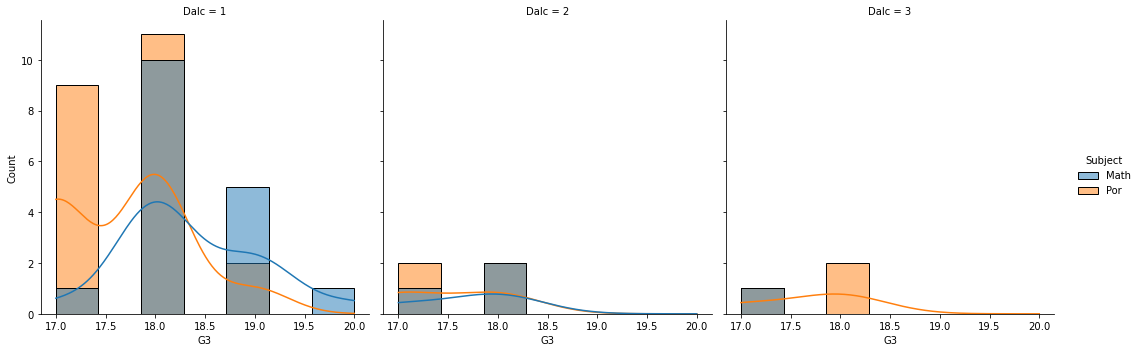

Top students in subjects (Walc)


D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

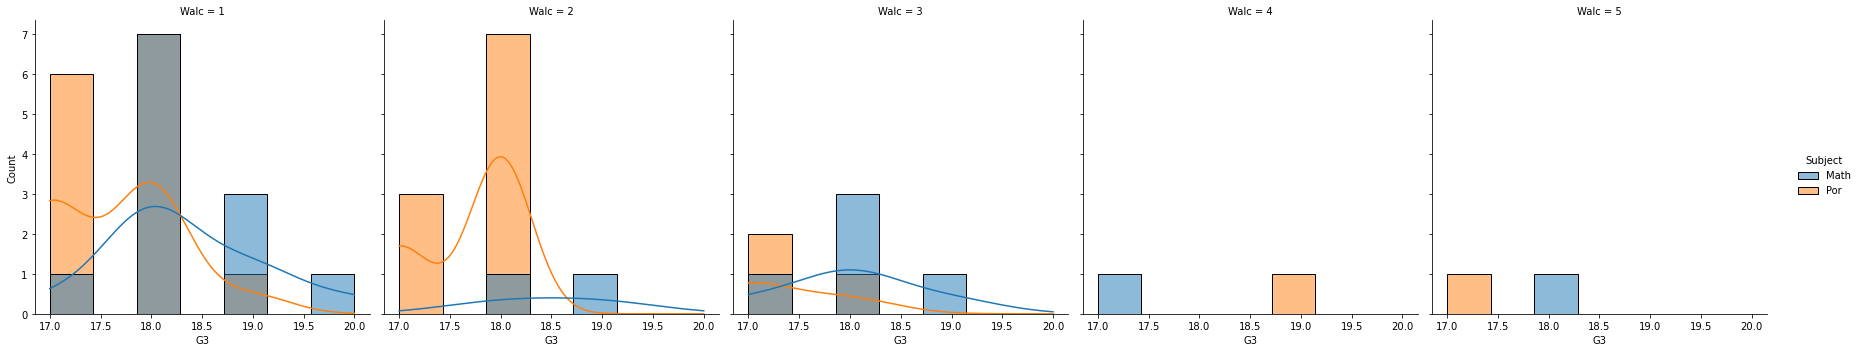

Lowest students in subjects (Dalc)


<Figure size 432x288 with 0 Axes>

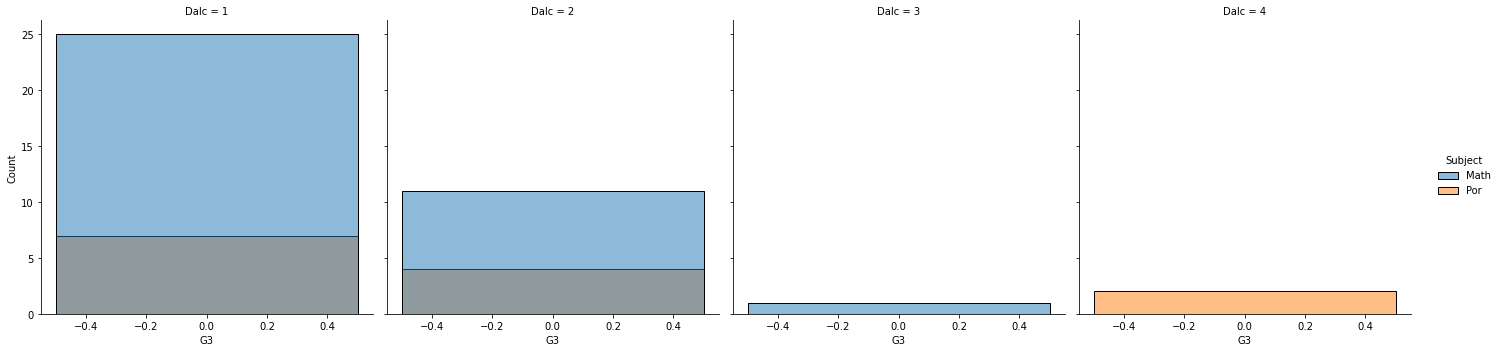

Lowest students in subjects (Walc)


<Figure size 432x288 with 0 Axes>

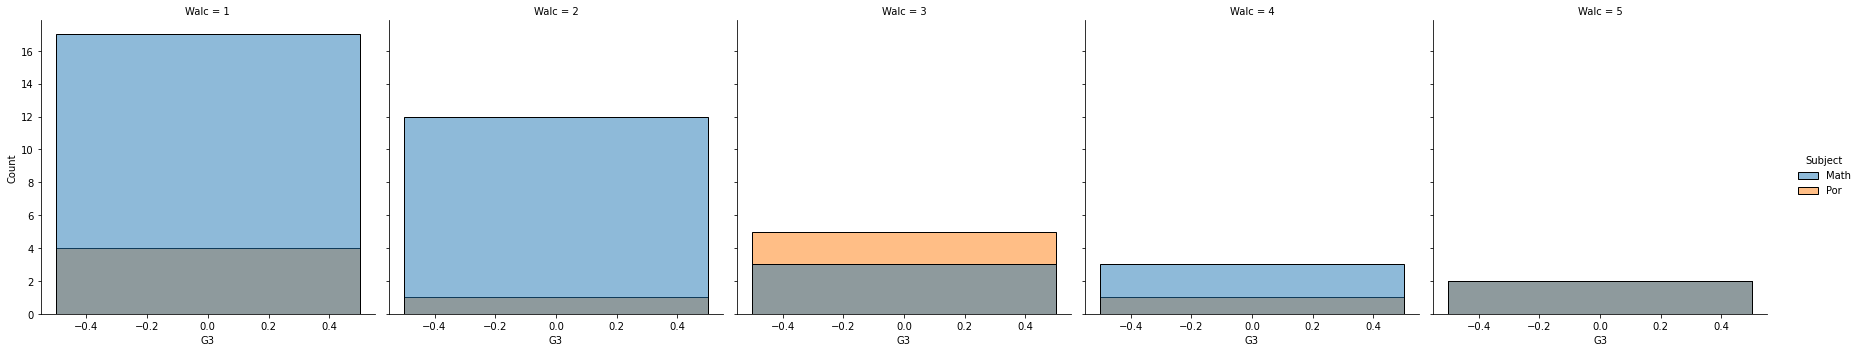

In [27]:
# Выполните сравнение отдельно для каждого предмета (Math и Por).
sorted_data = data_clean[['ID', 'G3', 'Subject', 'Dalc', 'Walc']].sort_values('G3', ascending=False)

for sub in ['Dalc', 'Walc']:
    print(f'Top students in subjects ({sub})')
    plt.figure(figsize=(6, 4))
    sns.displot(col=sub, x='G3', hue='Subject', kde=True, data=sorted_data[0:50])
    plt.show()

for sub in ['Dalc', 'Walc']:
    print(f'Lowest students in subjects ({sub})')
    plt.figure(figsize=(6, 4))
    sns.displot(col=sub, x='G3', hue='Subject', data=sorted_data[-50:])
    plt.show()

#### Вывод 2.

1) (Top students) Судя по графику, студенты португальского в целом выпивают больше и в будни, и на выходных.

2) (Lowest students) Очевидно, что студенты математики выпивают здесь больше (хотя, вероятно, студентов математики в целом больше среди 50 худших студентов).

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

In [28]:
corr_g3 = data_int[['G3', 'sex', 'traveltime', 'famsup', 'schoolsup', 'paid', 'internet', 'romantic', 'Dalc', 'Walc']].dropna(axis=0).corr()
corr_g3[:1].style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,G3,sex,traveltime,famsup,schoolsup,paid,internet,romantic,Dalc,Walc
G3,1.00,-0.03,-0.10,0.01,-0.08,-0.05,0.11,-0.10,-0.12,-0.11


#### Вывод

В целом зависимость оценки от всех перечисленных показателей маленькая. Тем не менее мы можем увидеть положительную и отрицательную зависимости:
 - положительная с показателями: **famsup, internet** - чем выше показатель в них, тем выше оценка (самая сильная с _internet_)
 - отрицательная с показателями: **sex, schoolsup, paid, romantic, Dalc, Walc** - чем выше показатель в них, тем ниже оценка (самая сильная с _Dalc_)

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

<Figure size 432x288 with 0 Axes>

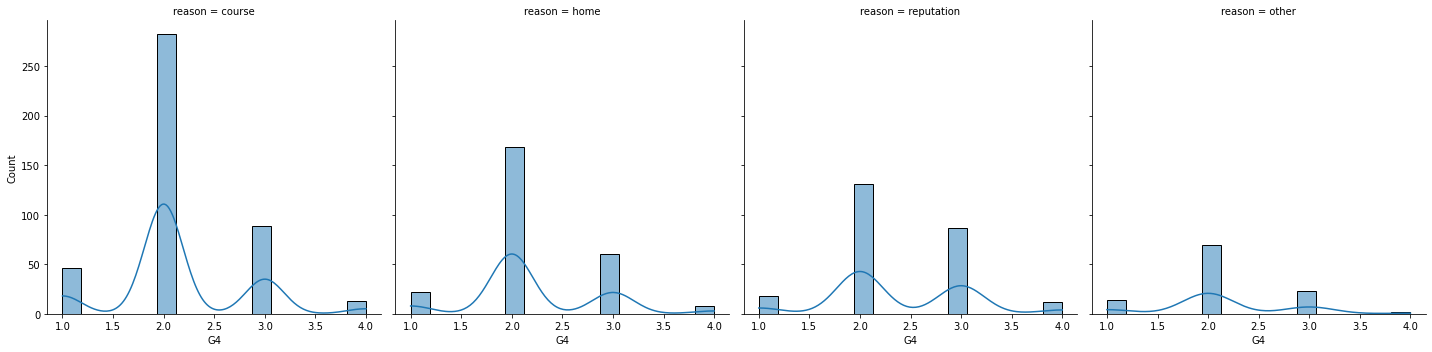

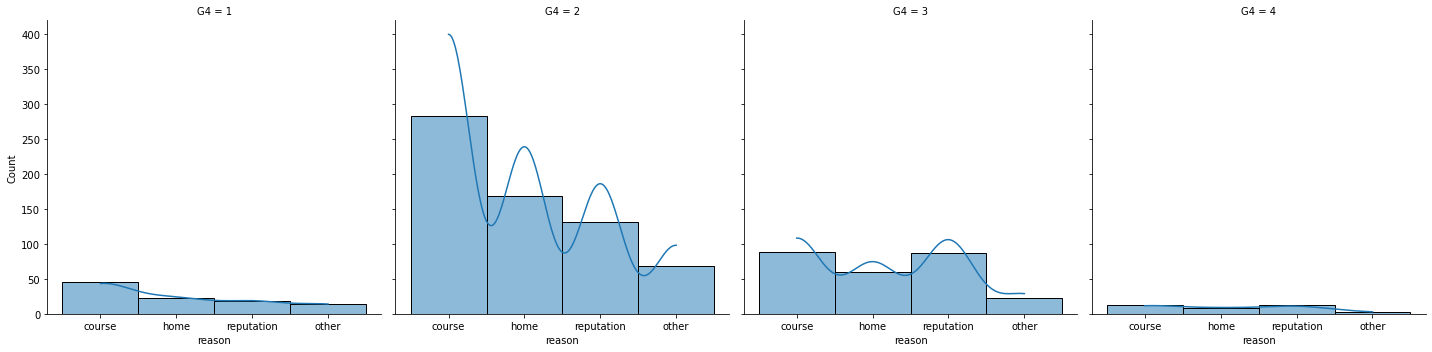

In [29]:
dict_marks = {}
for i in range(21):
    if i < 8:
        dict_marks[i] = 1
    elif i <= 13:
        dict_marks[i] = 2
    elif i <= 17:
        dict_marks[i] = 3
    elif i <= 20:
        dict_marks[i] = 4

data_clean['G4'] = pd.Series(data_int['G3'].map(dict_marks), index=data_int.index)
data_int['G4'] = pd.Series(data_int['G3'].map(dict_marks), index=data_int.index)

plt.figure(figsize=(6, 4))
sns.displot(col='reason', x='G4', kde=True, data=data_clean)
plt.show()

sns.displot(col='G4', x='reason', kde=True, data=data_clean)
plt.show()

#### Вывод

По всем оценкам наблюдается следующий тренд: количество записей (Count) уменьшается по причинам в следующей градации: course -> home -> reputation -> other

Особенно это заметно у группы оценок _"удовлетворительно"_, но тренд также правдив для оценки _"неудовлетворительно"_.

Для оценок _"хорошо"_ и _"отлично"_ причина **reputation** оказывается важнее причины **home**, а в остальном тренд идентичен предыдущим случаям.

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [30]:
# Определим какие столбцы были бы общими у студента независимо от курса

data_int.columns
cols = ['ID', 'Subject', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
        'Fjob', 'guardian', 'failures', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
        'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'famsup', 'studytime', 'G3', 'G4']

main_chars = data_clean[cols]
main_int = data_int[cols]

w_repeats = main_chars[main_chars.drop(columns=['ID', 'Subject', 'G3', 'G4']).duplicated(keep=False)==True]
w_repeats_int = main_int[main_int.drop(columns=['ID', 'Subject', 'G3', 'G4']).duplicated(keep=False)==True]

print(main_chars.drop(columns=['ID', 'Subject', 'G3', 'G4']).duplicated().sum(), '\n', w_repeats['Subject'].value_counts())
print(main_int.drop(columns=['ID', 'Subject', 'G3', 'G4']).duplicated().sum(), '\n', w_repeats_int['Subject'].value_counts())

299 
 Por     301
Math    297
Name: Subject, dtype: int64
303 
 1    305
0    301
Name: Subject, dtype: int64


#### Вывод 1.

По данным столбцам удалось найти:

1) в датасете без ошибок, но не приведеном к типу int64 _299_ записей-дупликатов (в сумме с дупликатами это _598_, причем по математике _297_ записей, а по португальскому _301_;

2) в датасете приведенному к int64 удалось найти _303_ дупликата (в сумме с повторами это _606_ записей, при чем по математике _301_, а по португальскому _305_)

<Figure size 432x288 with 0 Axes>

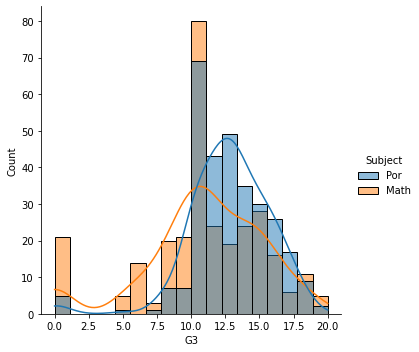

<Figure size 432x288 with 0 Axes>

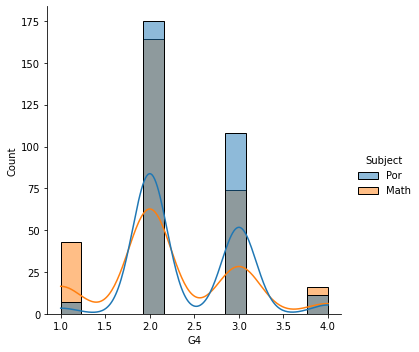

In [31]:
# Построим графики, сравним только итоговую оценку в двух системах оценивания
for mark in ['G3', 'G4']:
    plt.figure(figsize=(6, 4))
    sns.displot(x=mark, hue='Subject', kde=True, data=w_repeats)
    plt.show()

#### Вывод 2.

Из обоих графиков видно, что "крайние" (высокие и низкие) оценки выше по математике, в то время как "средних" оценок больше по португальскому.

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [32]:
corr_g4 = data_int.drop(columns=['ID']).dropna(axis=0).corr()
corr_g4[-1:].style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,G4
G4,0.12,-0.09,-0.02,-0.08,0.11,0.05,-0.01,0.20,0.13,0.09,0.05,0.11,-0.07,-0.10,0.17,-0.31,-0.13,-0.00,-0.04,0.05,0.05,0.20,0.11,-0.09,0.06,-0.04,-0.09,-0.13,-0.13,-0.11,-0.07,0.01,0.78,0.84,0.87,1.00


In [33]:
# Поробуем использовать корреляцию в качестве коэффицентов к данным соответствующего столбца. 
# Не берем столбцы G2, G3 и G4 так как G4 нужно предсказать, G3 является производной от G1 и G2, 
# G2 потому что нам нужна лишь одна оценка (предскажем в 20-бальной и переведем в 4)
res = []
res_4 = []
for i in range(len(data_int)):
    res.append(0)
    for col in corr_g4.columns[:-3]:
        res[i] += data_int.iloc[i][col] * corr_g4.iloc[-1][col]
    res_4.append(dict_marks.get(round(res[i]-1), 0) + 1) 
    # Вычтем единицу (как 100% корреляции) из получившегося значения до перевода в 4-х бальную систему, 
    # затем прибавим 1 к получившемуся результату в качестве компенсации неучтенного столбца G2 
    # (если мы прибавим 0.84 и округлим, получим то же число)

equal = 0 
for ind, mark in enumerate(list(data_int['G4'])):
    if mark == res_4[ind]:
        equal += 1

print(f'Точность прогнозирования: {round(equal/len(res_4)*100, 2)}%')

Точность прогнозирования: 70.4%


### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [34]:
# your code here